In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('TCS.NS.csv')

In [3]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.062008,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.668533,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.692036,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.692036,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.627970,811856.0
5,2002-08-19,36.674999,36.674999,35.137501,35.474998,25.969135,205880.0
6,2002-08-20,35.724998,38.724998,35.487499,36.462502,26.692036,3773624.0
7,2002-08-21,38.474998,39.200001,36.525002,38.250000,28.000542,3011064.0
8,2002-08-22,39.512501,41.575001,39.312500,39.900002,29.208418,6732480.0
9,2002-08-23,40.250000,43.625000,39.762501,42.299999,30.965311,4841672.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5029 non-null   object 
 1   Open       5020 non-null   float64
 2   High       5020 non-null   float64
 3   Low        5020 non-null   float64
 4   Close      5020 non-null   float64
 5   Adj Close  5020 non-null   float64
 6   Volume     5020 non-null   float64
dtypes: float64(6), object(1)
memory usage: 275.1+ KB


In [5]:
data['Date']=pd.to_datetime(data['Date'])

In [6]:
data=data.set_index(data['Date']).asfreq('D')

In [7]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2002-08-12,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.062008,212976.0
2002-08-13,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.668533,153576.0
2002-08-14,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.692036,822776.0
2002-08-15,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.692036,0.0
2002-08-16,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.627970,811856.0
2002-08-17,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-18,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-19,2002-08-19,36.674999,36.674999,35.137501,35.474998,25.969135,205880.0
2002-08-20,2002-08-20,35.724998,38.724998,35.487499,36.462502,26.692036,3773624.0


In [8]:
data.isnull().any()

Date         True
Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [9]:
data.drop('Date',axis=1,inplace=True)

In [10]:
new_date=pd.date_range(start='2002-08-12',end='2022-10-25',freq="D")
data=data.reindex(new_date,fill_value=np.nan)

In [11]:
data.fillna(method='bfill',inplace=True)

In [12]:
data.drop('Volume',inplace=True,axis=1)

In [13]:
ts_data=data.copy()

<AxesSubplot:>

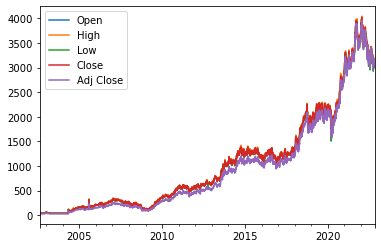

In [14]:
data.plot()

In [15]:
rol_mean=data.rolling(window=12).mean()
rol_std=data.rolling(window=12).std()

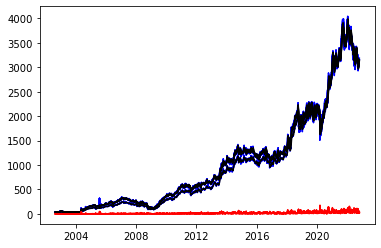

In [16]:
plt.plot(data,c='blue')
plt.plot(rol_mean,c='black')
plt.plot(rol_std,c='red')

In [17]:
from statsmodels.tsa.stattools import adfuller
def stationarycheck(a):
    r=adfuller(data[a])
    print(r)

In [18]:
for i in data.columns:
    print(i,":")
    stationarycheck(i)

Open :
(0.5167090782957613, 0.9853722039161766, 36, 7343, {'1%': -3.431240860337713, '5%': -2.861933691590107, '10%': -2.5669795577476773}, 63835.89051909029)
High :
(0.5452880337877178, 0.9861864937943133, 27, 7352, {'1%': -3.4312397694039465, '5%': -2.861933209553657, '10%': -2.5669793011524624}, 61726.91116843032)
Low :
(0.5243231115540318, 0.9855939259812792, 28, 7351, {'1%': -3.4312398904868466, '5%': -2.8619332630549628, '10%': -2.5669793296320065}, 62607.03217576246)
Close :
(0.4960927774829938, 0.9847538543550299, 23, 7356, {'1%': -3.4312392854016696, '5%': -2.8619329956939263, '10%': -2.566979187311738}, 63627.14993296944)
Adj Close :
(0.7838109490976655, 0.9913703007930507, 23, 7356, {'1%': -3.4312392854016696, '5%': -2.8619329956939263, '10%': -2.566979187311738}, 62770.43917009971)


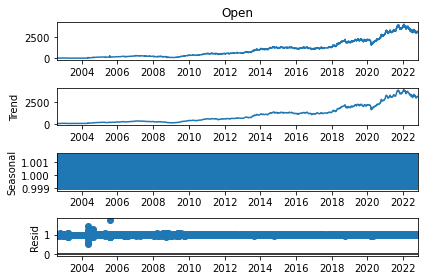

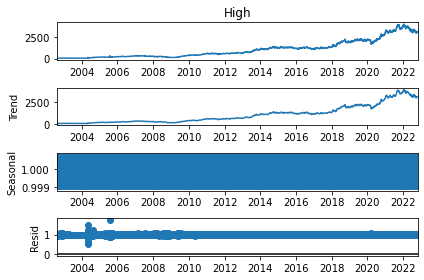

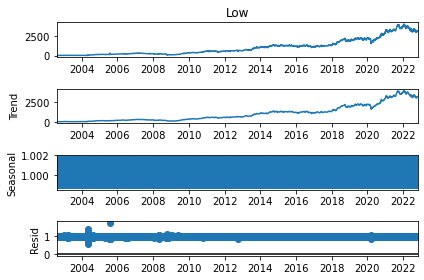

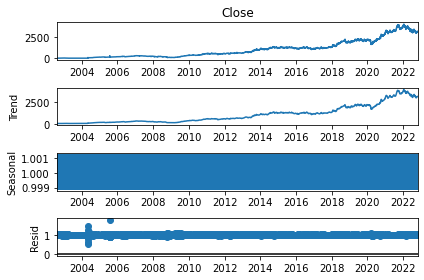

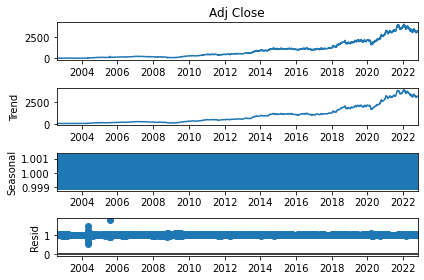

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
for i in data.columns:
    decompose=seasonal_decompose(data[i],model='multiplicative')
    decompose.plot()

In [52]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf,pacf

def arima_pqr(a,b=1):
    
    data_new=data[a]-data[a].shift(b)
    l=adfuller(data_new.dropna())
    if l[1]<=0.05:
        fig=plt.figure(figsize=(12,6))
        print(b)
        print(l)
        
        d_acf=acf(data_new.dropna())
        d_pacf=pacf(data_new.dropna())
        '''
        fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
        ax1.set_ylim(0,1)
        plot_pacf(data_new.dropna(),ax=ax1)
        ax2.set_ylim(0,1)
        plot_acf(data_new.dropna(),ax=ax2)
        ax3.set_title("Differrence")
        ax3.set_ylim(0,1)
        ax3.plot(data_new.dropna(),ax=ax3)
        '''
        ax1=fig.add_subplot(311)
        ax1.plot(d_acf)
        ax1.grid()
        ax1.set_ylim([-0.25,0.25])
        ax1.set_xlim([0,10])
        #plot_acf(data_new)
        ax2=fig.add_subplot(312)
        ax2.grid()
        ax2.set_ylim([-0.25,0.25])
        ax2.set_xlim([0,10])
        #plot_pacf(data_new)
        ax2.plot(d_pacf)
        ax3=fig.add_subplot(313)
        ax3.plot(data_new)
    else:
        arima_pqr(a,(b+1))
        
        
    
    

1
(-14.563205847526824, 4.757602774873854e-27, 35, 7343, {'1%': -3.431240860337713, '5%': -2.861933691590107, '10%': -2.5669795577476773}, 63826.475613426504)


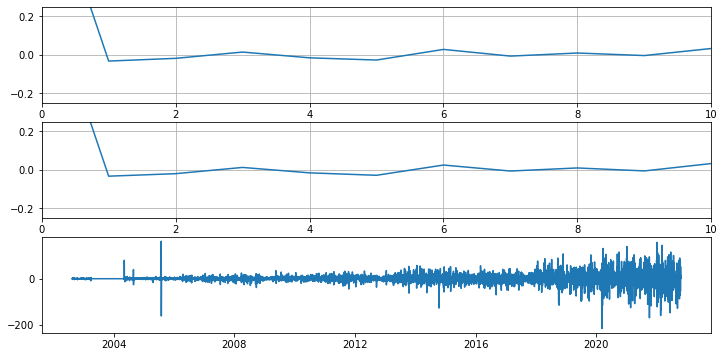

In [53]:
arima_pqr('Open')

In [95]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['Close'],order=(3,1,3))
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 7380
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -31965.306
Date:                Tue, 08 Nov 2022   AIC                          63944.611
Time:                        13:56:08   BIC                          63992.956
Sample:                    08-12-2002   HQIC                         63961.226
                         - 10-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5801      0.311      1.866      0.062      -0.029       1.189
ar.L2         -0.5179      0.315     -1.646      0.100      -1.135       0.099
ar.L3         -0.3848      0.289     -1.332      0.1

In [97]:
res=pd.DataFrame(model_fit.forecast(730))

In [98]:
res

,predicted_mean
2022-10-26,3162.266940
2022-10-27,3162.909944
2022-10-28,3163.439045
2022-10-29,3163.348772
2022-10-30,3162.774963
...,...
2024-10-20,3162.822593
2024-10-21,3162.822593
2024-10-22,3162.822593
2024-10-23,3162.822593


<AxesSubplot:>

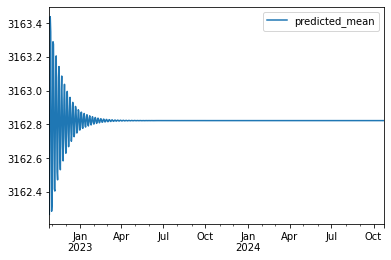

In [99]:
res.plot()

In [90]:
res.columns=['Close']
ts_data_final=pd.DataFrame(data)
ts_data_pred=ts_data_final.append(res)

C:\Users\Bhavesh Kumar B\AppData\Local\Temp\ipykernel_6776\3845734178.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ts_data_pred=ts_data_final.append(res)


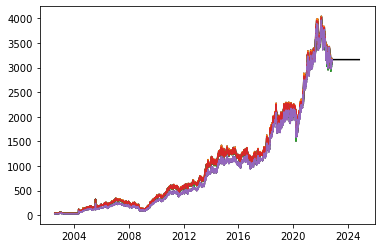

In [60]:
plt.plot(ts_data_pred,c='black')
plt.plot(data)

In [91]:
model=ARIMA(data['Open'],order=(7,1,7))
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [92]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 7380
Model:                 ARIMA(7, 1, 7)   Log Likelihood              -32054.327
Date:                Tue, 08 Nov 2022   AIC                          64138.655
Time:                        13:55:13   BIC                          64242.251
Sample:                    08-12-2002   HQIC                         64174.258
                         - 10-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5157      0.241     -2.142      0.032      -0.988      -0.044
ar.L2          0.0964      0.072      1.348      0.178      -0.044       0.237
ar.L3          0.1051      0.094      1.112      0.2

In [93]:
res=pd.DataFrame(model_fit.forecast(730))

<AxesSubplot:>

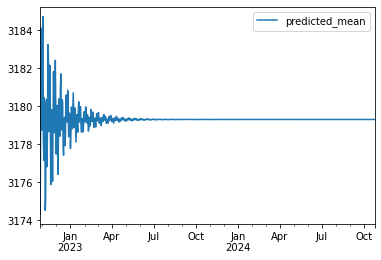

In [94]:
res.plot()

In [65]:
res.rename({'predicted_mean':"Open"},inplace=True,axis=1)

In [66]:
res
pred_data=res.copy()

1
(-17.216255282949252, 6.322013611621765e-30, 26, 7352, {'1%': -3.4312397694039465, '5%': -2.861933209553657, '10%': -2.5669793011524624}, 61717.80360784232)


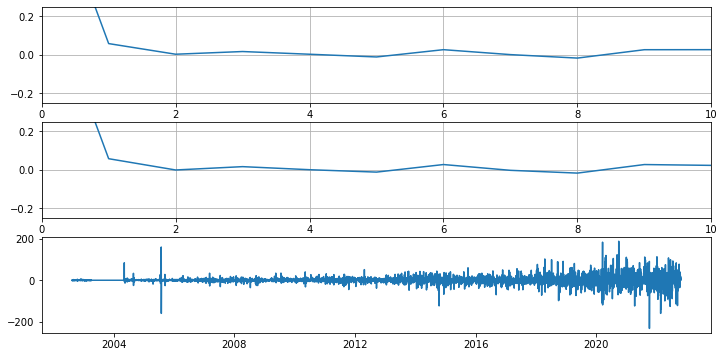

In [67]:
arima_pqr('High')

In [100]:
model=ARIMA(data['High'],order=(2,1,2))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 7380
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -31015.077
Date:                Tue, 08 Nov 2022   AIC                          62040.154
Time:                        13:57:03   BIC                          62074.686
Sample:                    08-12-2002   HQIC                         62052.021
                         - 10-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0598      0.466      0.128      0.898      -0.854       0.974
ar.L2          0.2149      0.107      2.004      0.045       0.005       0.425
ma.L1         -0.0016      0.466     -0.004      0.9

In [101]:
res1=pd.DataFrame(model_fit.forecast(730))

In [102]:
res1

,predicted_mean
2022-10-26,3184.615766
2022-10-27,3184.687133
2022-10-28,3184.769997
2022-10-29,3184.790289
2022-10-30,3184.809308
...,...
2024-10-20,3184.822523
2024-10-21,3184.822523
2024-10-22,3184.822523
2024-10-23,3184.822523


In [103]:
pred_data['High']=res1['predicted_mean']

1
(-16.64592399293851, 1.6195351280951993e-29, 27, 7351, {'1%': -3.4312398904868466, '5%': -2.8619332630549628, '10%': -2.5669793296320065}, 62597.77921903727)


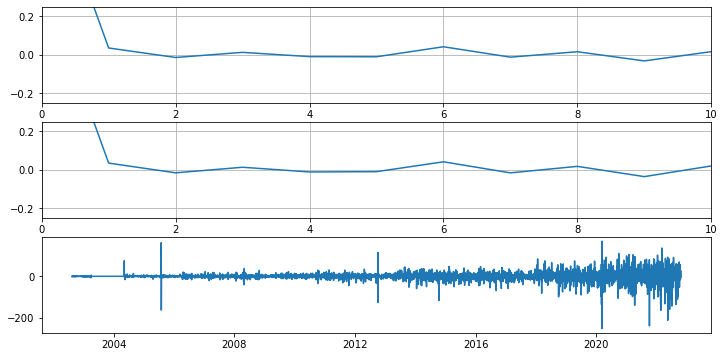

In [72]:
arima_pqr('Low')

In [104]:
model=ARIMA(data['Low'],order=(4,1,4))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                 7380
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -31439.097
Date:                Tue, 08 Nov 2022   AIC                          62896.194
Time:                        13:57:29   BIC                          62958.352
Sample:                    08-12-2002   HQIC                         62917.556
                         - 10-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8581      0.016    -53.497      0.000      -0.890      -0.827
ar.L2         -0.6311      0.023    -27.650      0.000      -0.676      -0.586
ar.L3         -0.8032      0.022    -36.830      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [105]:
res2=pd.DataFrame(model_fit.forecast(730))

In [106]:
pred_data['Low']=res2['predicted_mean']

1
(-18.280872766012127, 2.3085009481186444e-30, 22, 7356, {'1%': -3.4312392854016696, '5%': -2.8619329956939263, '10%': -2.566979187311738}, 63617.72408660888)


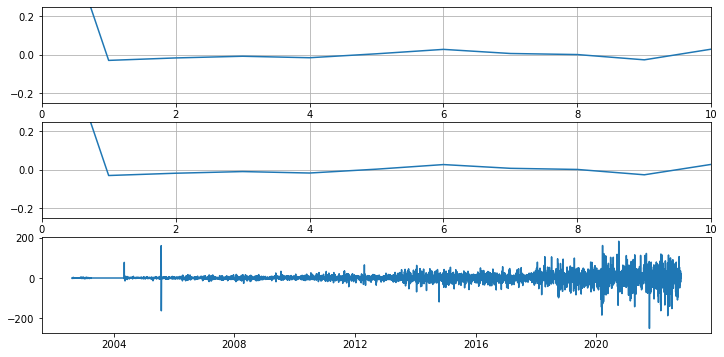

In [76]:
arima_pqr('Close')

In [107]:
model=ARIMA(data['Close'],order=(3,1,3))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 7380
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -31965.306
Date:                Tue, 08 Nov 2022   AIC                          63944.611
Time:                        13:58:19   BIC                          63992.956
Sample:                    08-12-2002   HQIC                         63961.226
                         - 10-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5801      0.311      1.866      0.062      -0.029       1.189
ar.L2         -0.5179      0.315     -1.646      0.100      -1.135       0.099
ar.L3         -0.3848      0.289     -1.332      0.1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [108]:
res1=pd.DataFrame(model_fit.forecast(730))

In [109]:
pred_data['Close']=res1['predicted_mean']

1
(-18.17454019539623, 2.4420434932727026e-30, 22, 7356, {'1%': -3.4312392854016696, '5%': -2.8619329956939263, '10%': -2.566979187311738}, 62761.4998118387)


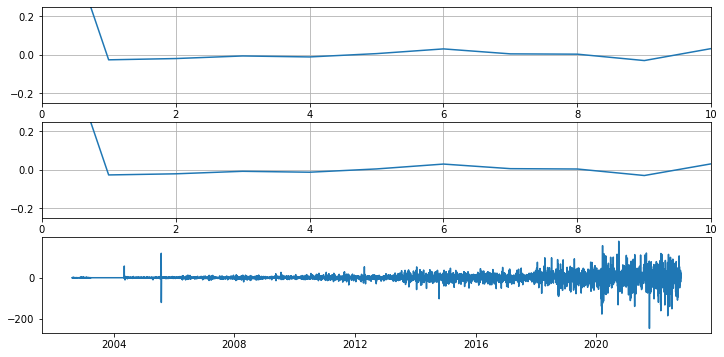

In [80]:
arima_pqr('Adj Close')

In [116]:
model=ARIMA(data['Adj Close'],order=(8,1,8))
model_fit=model.fit()
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 7380
Model:                 ARIMA(8, 1, 8)   Log Likelihood              -31532.646
Date:                Tue, 08 Nov 2022   AIC                          63099.292
Time:                        14:01:12   BIC                          63216.701
Sample:                    08-12-2002   HQIC                         63139.643
                         - 10-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4201      0.344      1.221      0.222      -0.254       1.094
ar.L2         -0.2144      0.294     -0.730      0.465      -0.790       0.361
ar.L3         -0.3048      0.109     -2.796      0.0

In [117]:
res1=pd.DataFrame(model_fit.forecast(730))

In [118]:
pred_data['Adj Close']=res1['predicted_mean']

In [119]:
pred_data

,Open,High,Low,Close,Adj Close
2022-10-26,3175.511005,3184.615766,3145.416604,3162.266940,3165.259637
2022-10-27,3173.052643,3184.687133,3148.708295,3162.909944,3162.705899
2022-10-28,3178.983924,3184.769997,3149.291181,3163.439045,3165.821086
2022-10-29,3179.652602,3184.790289,3149.889376,3163.348772,3164.245684
2022-10-30,3171.559624,3184.809308,3151.569381,3162.774963,3164.829374
...,...,...,...,...,...
2024-10-20,3174.179610,3184.822523,3149.006835,3162.822593,3164.471718
2024-10-21,3174.179669,3184.822523,3149.006834,3162.822593,3164.471718
2024-10-22,3174.179715,3184.822523,3149.006834,3162.822593,3164.471718
2024-10-23,3174.179735,3184.822523,3149.006834,3162.822593,3164.471718


In [120]:
ts_data_pred=ts_data.append(pred_data)

C:\Users\Bhavesh Kumar B\AppData\Local\Temp\ipykernel_6776\439453084.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ts_data_pred=ts_data.append(pred_data)


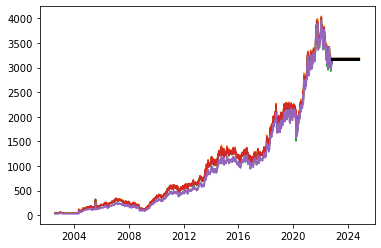

In [121]:
plt.plot(ts_data_pred)
plt.plot(pred_data,c='black')

In [87]:
import re

In [88]:
def text_checker(s):
    pattern="^[a-z]+_[a-z]*$"
    if re.search(pattern,s):
        print('Pattern present')
    else:
        print('Pattern not present')

In [89]:
s=str(input("Enter the string:"))
text_checker(s)

KeyboardInterrupt: Interrupted by user

In [ ]:
def email_checker(email):
    pattern='^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}$'
    if re.search(pattern,email):
        print(email,"is a valid Email")
    else:
        print(email,"is a not valid Email")
            
        
    

In [ ]:
email=str(input('Enter the Email: '))
email_checker(email)

In [ ]:
def abmatch(s):
    pattern='a.*?b$'
    if re.search(pattern,s):
        print("Pattern present")
    else:
        print("Pattern not present")


In [ ]:
text=str(input('Enter the text: '))
abmatch(text)

In [ ]:
def replace(text):
    return text.replace(" ","_")

In [ ]:
s=str(input("Enter the text: "))
print(replace(s))

In [ ]:
def change_date(date):
    return re.sub(r'(\d{4})-(\d{1,2})-(\d{1,2})','\\3-\\2-\\1',date)

In [ ]:
date=str(input("Enter the date: "))
print("Original date:",date)
print("Modified date: ",change_date(date))